In [1]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd

In [35]:
df = pd.read_excel('Superstore Dataset.xlsx', sheet_name='Orders', engine='openpyxl')

In [36]:
df_cleaned= df.dropna(subset=['Row ID'])

In [16]:
df_cleaned

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1.0,US-2019-103800,2019-01-03,2019-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2.0,0.2,5.5512
1,2.0,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2.0,0.8,-5.4870
2,3.0,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3.0,0.2,4.2717
3,4.0,US-2019-112326,2019-01-04,2019-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3.0,0.2,-64.7748
4,5.0,US-2019-141817,2019-01-05,2019-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3.0,0.2,4.8840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32479,32480.0,CA-2018-103772,2018-06-28,2018-07-02,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,...,30080,South,OFF-BI-10002867,Office Supplies,Binders,GBC Recycled Regency Composition Covers,119.560,2.0,0.0,54.9976
32480,32481.0,CA-2018-103772,2018-06-28,2018-07-02,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,...,30080,South,OFF-AR-10000538,Office Supplies,Art,"Boston Model 1800 Electric Pencil Sharpener, Gray",140.750,5.0,0.0,42.2250
32481,32482.0,US-2018-151435,2018-09-06,2018-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.980,1.0,0.0,22.3548
32482,32483.0,CA-2018-100251,2018-05-17,2018-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10.0,0.0,15.1200


In [17]:
df_cleaned.describe()

,Row ID,Sales,Quantity,Discount,Profit
count,32484.000000,32484.000000,32484.000000,32484.000000,32484.000000
mean,16242.500000,228.444837,3.791405,0.155651,28.709803
std,9377.467409,612.222614,2.228231,0.206491,230.244220
min,1.000000,0.444000,1.000000,0.000000,-6599.978000
25%,8121.750000,17.248000,2.000000,0.000000,1.735200
50%,16242.500000,54.480000,3.000000,0.200000,8.704000
75%,24363.250000,209.700000,5.000000,0.200000,29.525400
max,32484.000000,22638.480000,14.000000,0.800000,8399.976000


In [18]:
unique_values = df_cleaned.nunique()

# Display the number of unique values for each column
print(unique_values)

Row ID           32484
Order ID         16259
Order Date        3486
Ship Date         3716
Ship Mode            4
Customer ID        804
Customer Name      800
Segment              3
Country              2
City               542
State               59
Postal Code       1285
Region               4
Product ID        1862
Category             3
Sub-Category        17
Product Name      1853
Sales             6161
Quantity            14
Discount            12
Profit            7597
dtype: int64


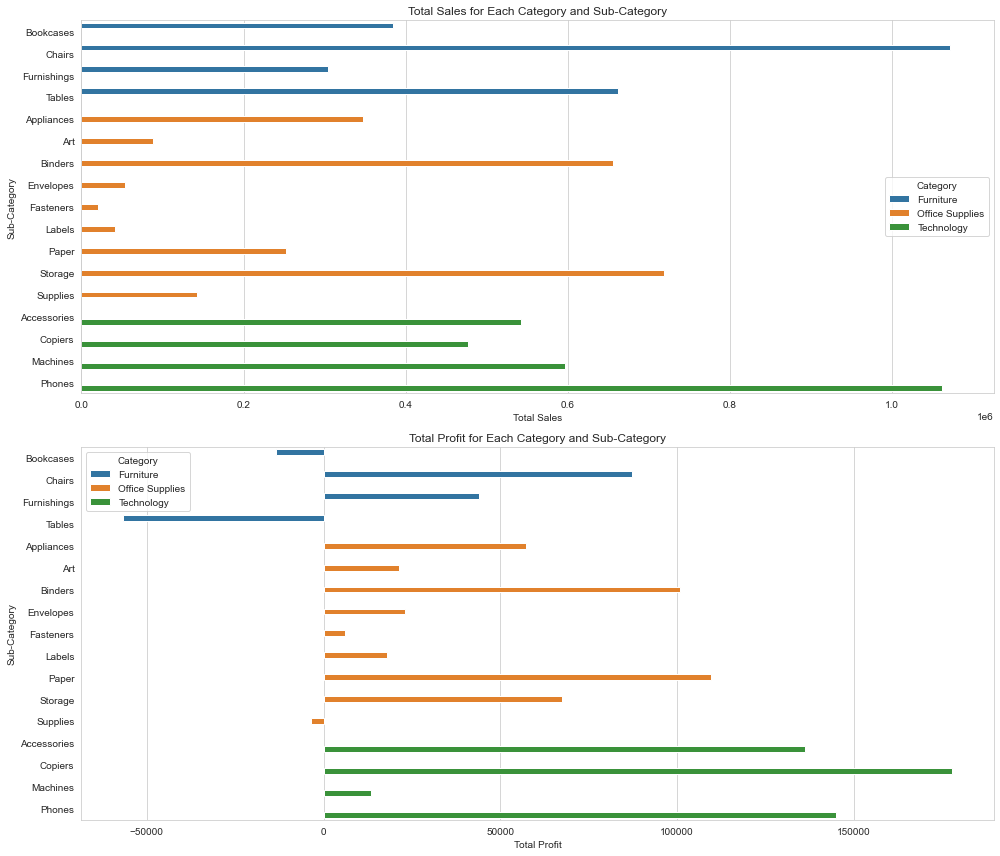

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Category' and 'Sub-Category' and sum the 'Sales' and 'Profit'
grouped_data = df_cleaned.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots, one for Sales and one for Profit
fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Plot the Sales data
sns.barplot(data=grouped_data, x='Sales', y='Sub-Category', hue='Category', ax=axes[0])
axes[0].set_title('Total Sales for Each Category and Sub-Category')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Sub-Category')

# Plot the Profit data
sns.barplot(data=grouped_data, x='Profit', y='Sub-Category', hue='Category', ax=axes[1])
axes[1].set_title('Total Profit for Each Category and Sub-Category')
axes[1].set_xlabel('Total Profit')
axes[1].set_ylabel('Sub-Category')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


In [20]:
product_name_id_counts = df_cleaned.groupby('Product Name')['Product ID'].nunique()

# Filter product names with more than one unique product ID
product_names_with_multiple_ids = product_name_id_counts[product_name_id_counts > 1]

# Display the product names with multiple IDs
print(product_names_with_multiple_ids)

Product Name
#10- 4 1/8" x 9 1/2" Recycled Envelopes           2
Avery Non-Stick Binders                           2
DAX Wood Document Frame                           2
Easy-staple paper                                 8
Eldon Wave Desk Accessories                       2
KI Adjustable-Height Table                        2
Okidata C610n Printer                             2
Peel & Seel Recycled Catalog Envelopes, Brown     2
Prang Drawing Pencil Set                          2
Staple envelope                                   9
Staple holder                                     3
Staple magnet                                     2
Staple remover                                    3
Staple-based wall hangings                        2
Staples                                          10
Staples in misc. colors                           7
Storex Dura Pro Binders                           2
Name: Product ID, dtype: int64


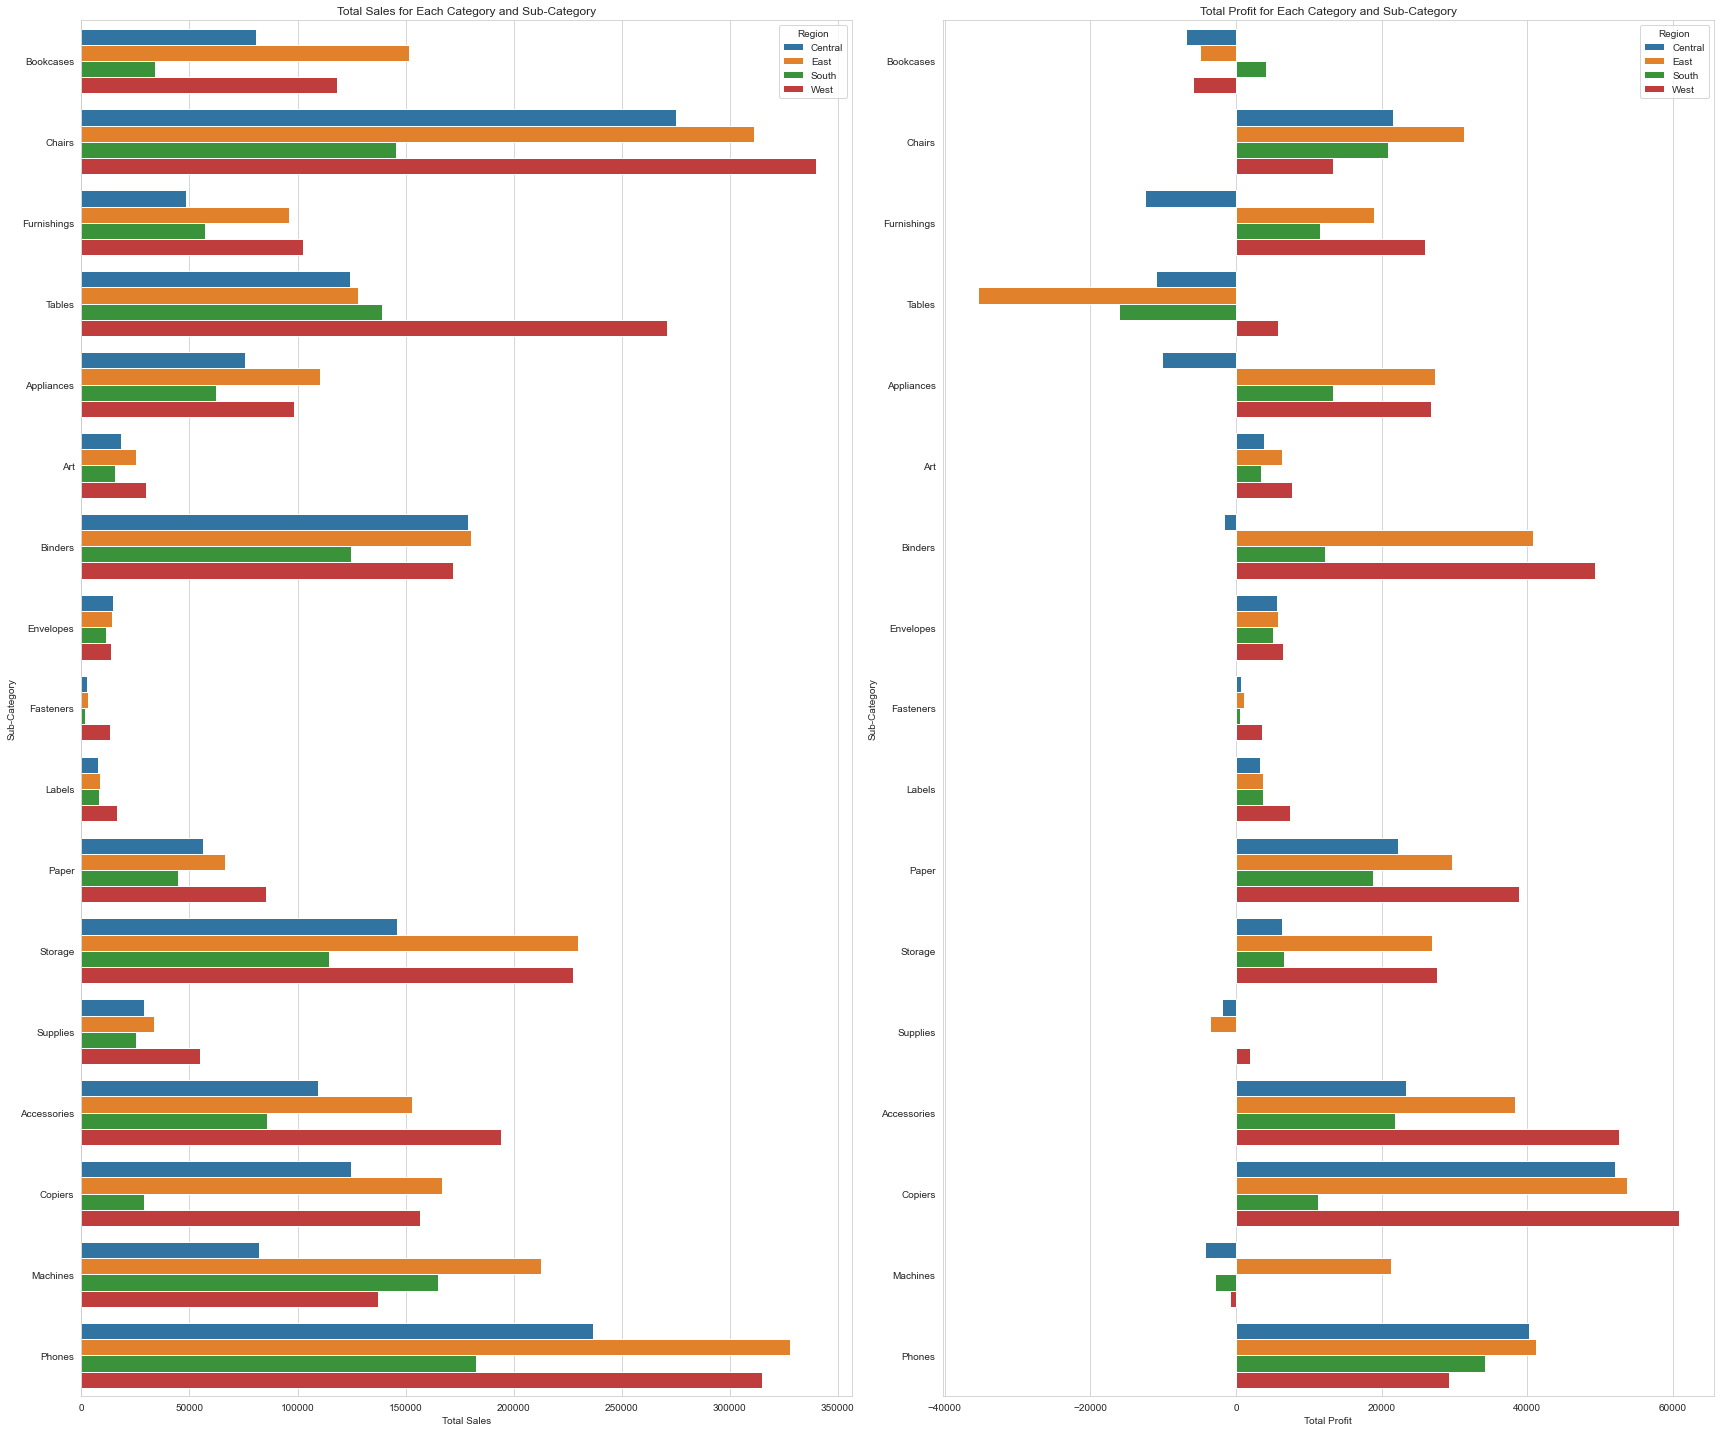

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Region', 'Category', and 'Sub-Category' and sum the 'Sales' and 'Profit'
grouped_data = df_cleaned.groupby(['Region', 'Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots, one for Sales and one for Profit
fig, axes = plt.subplots(1, 2, figsize=(24, 20))

# Plot the Sales data for all regions
sns.barplot(data=grouped_data, x='Sales', y='Sub-Category', hue='Region', ax=axes[0])
axes[0].set_title('Total Sales for Each Category and Sub-Category')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Sub-Category')

# Plot the Profit data for all regions
sns.barplot(data=grouped_data, x='Profit', y='Sub-Category', hue='Region', ax=axes[1])
axes[1].set_title('Total Profit for Each Category and Sub-Category')
axes[1].set_xlabel('Total Profit')
axes[1].set_ylabel('Sub-Category')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


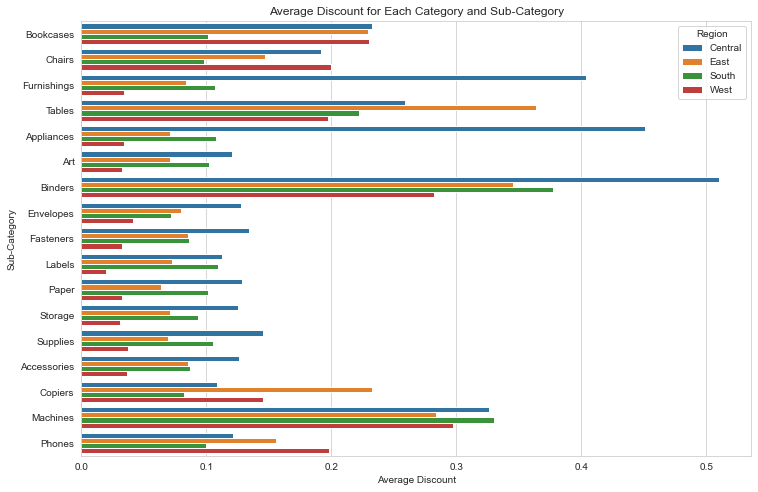

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Region', 'Category', and 'Sub-Category' and calculate the average 'Discount'
grouped_data = df_cleaned.groupby(['Region', 'Category', 'Sub-Category']).agg({'Discount': 'mean'}).reset_index()

# Set the aesthetic style of the plot
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the Average Discount data for all regions
sns.barplot(data=grouped_data, x='Discount', y='Sub-Category', hue='Region')
plt.title('Average Discount for Each Category and Sub-Category')
plt.xlabel('Average Discount')
plt.ylabel('Sub-Category')

# Adjust the legend
plt.legend(title='Region')

# Show the plot
plt.show()


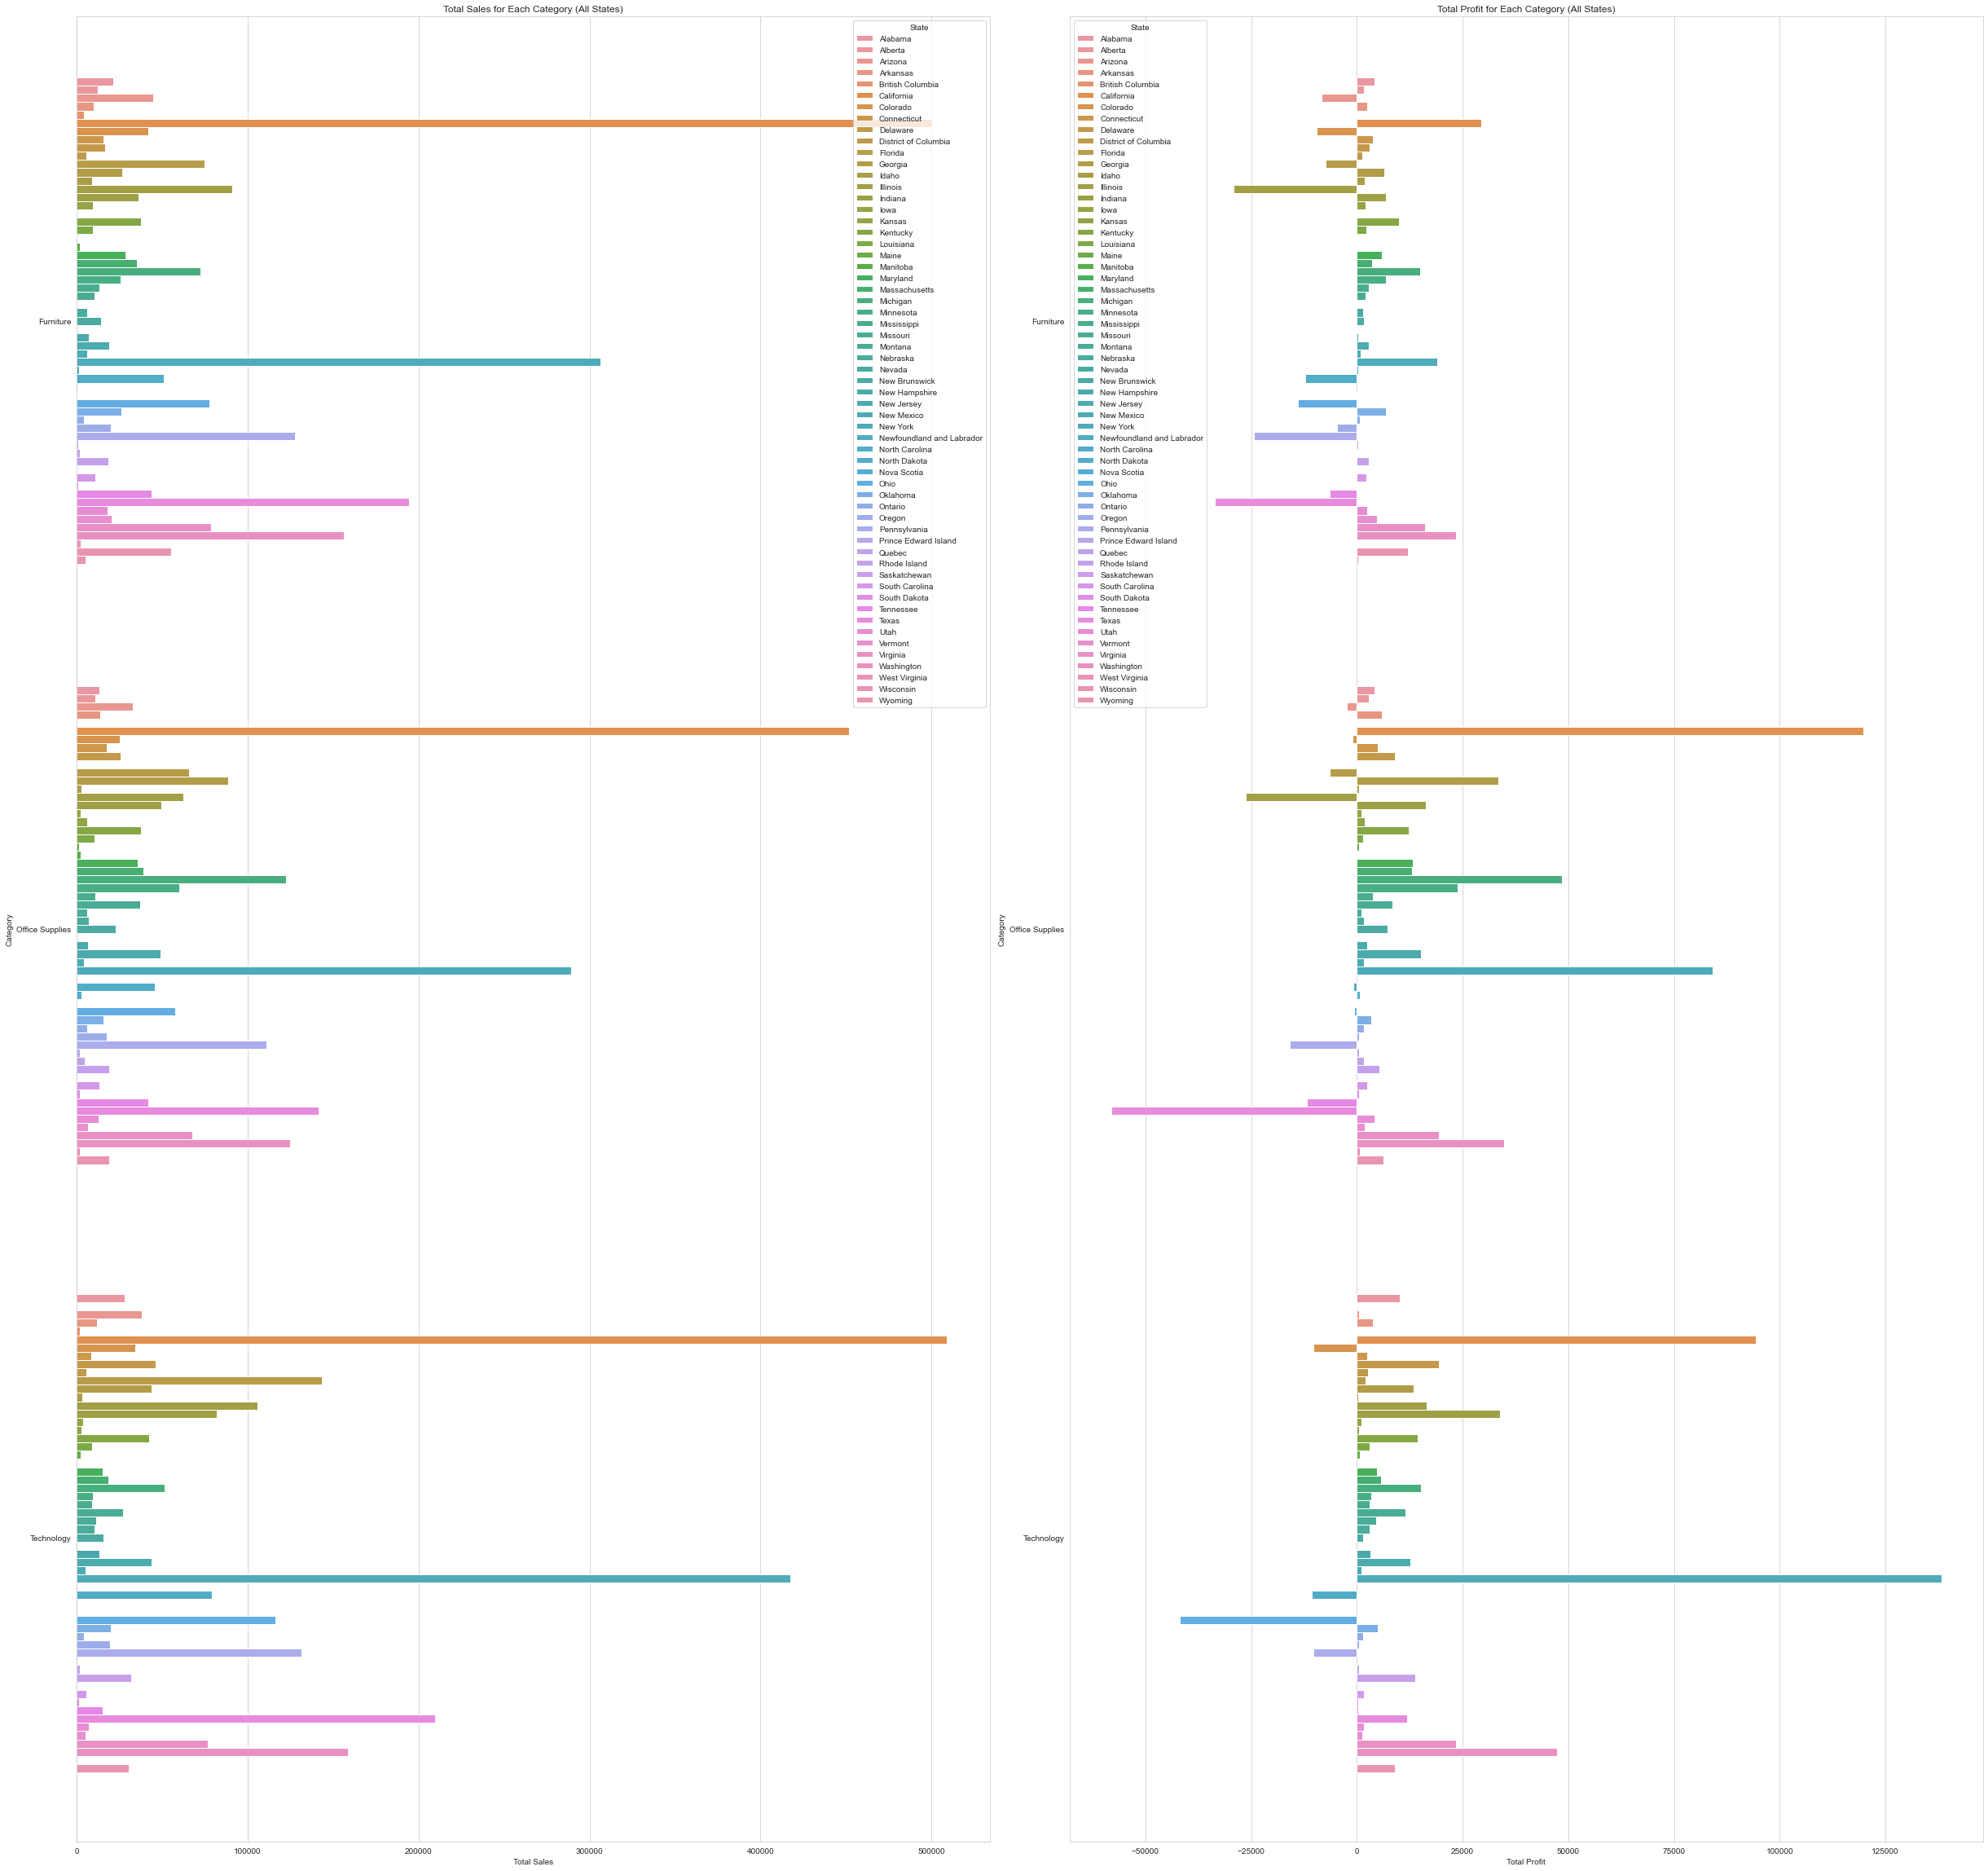

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'State', 'Category', and 'Sub-Category' and sum the 'Sales' and 'Profit'
grouped_data = df_cleaned.groupby(['State', 'Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots, one for Sales and one for Profit
fig, axes = plt.subplots(1, 2, figsize=(34, 32))  # Increased size of the figure

# Plot the Sales data for all states
sns.barplot(data=grouped_data, x='Sales', y='Category', hue='State', ax=axes[0])
axes[0].set_title('Total Sales for Each Category (All States)')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Category')

# Plot the Profit data for all states
sns.barplot(data=grouped_data, x='Profit', y='Category', hue='State', ax=axes[1])
axes[1].set_title('Total Profit for Each Category (All States)')
axes[1].set_xlabel('Total Profit')
axes[1].set_ylabel('Category')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


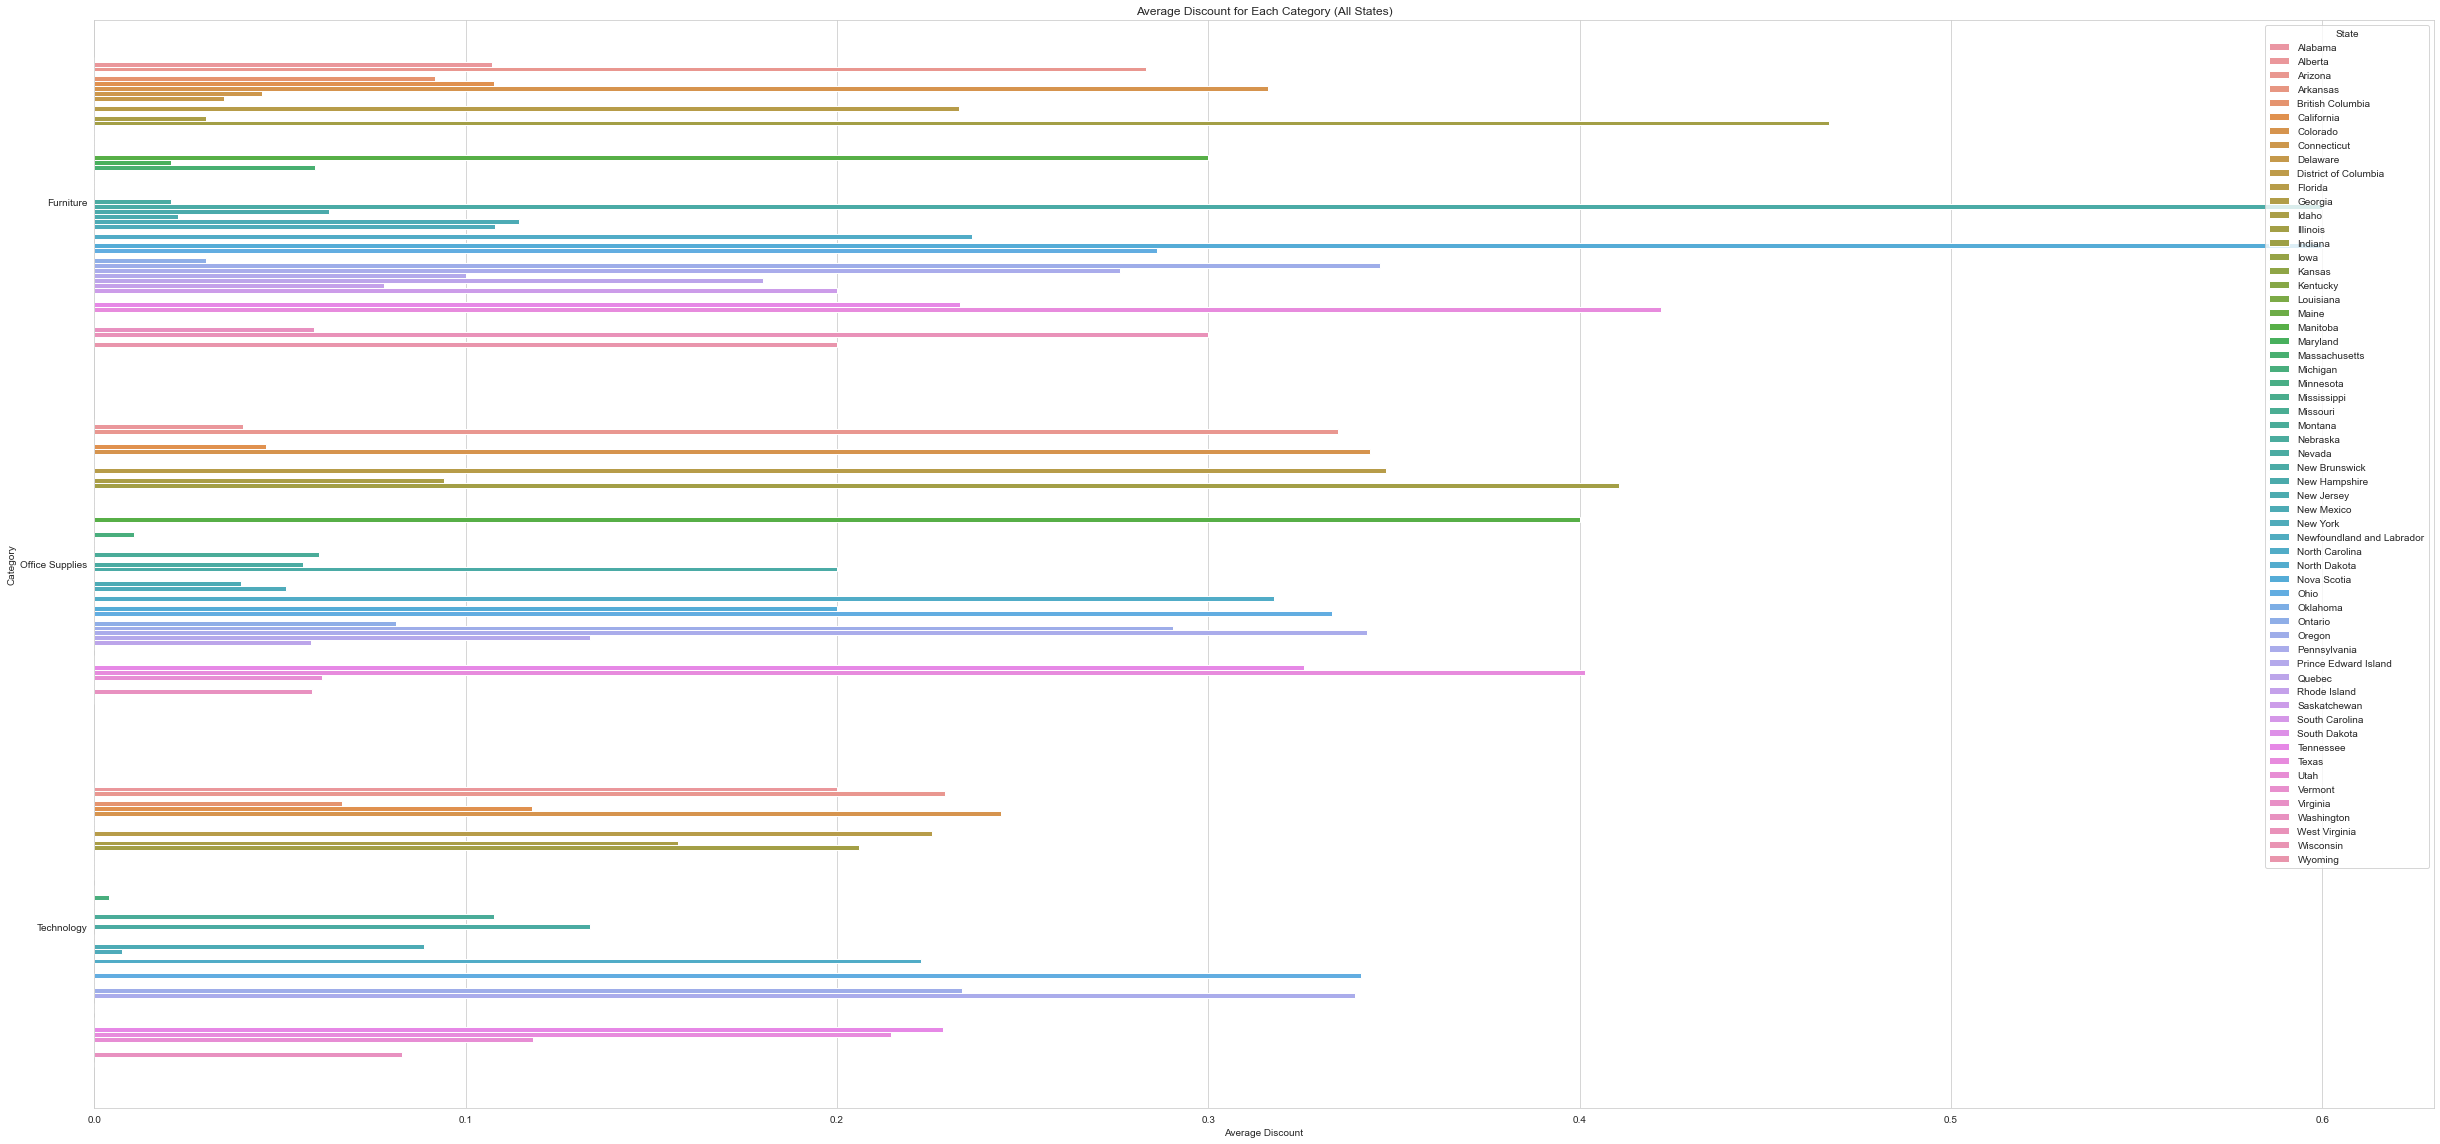

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'State', 'Category', and 'Sub-Category' and calculate the average 'Discount'
grouped_data = df_cleaned.groupby(['State', 'Category']).agg({'Discount': 'mean'}).reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with one subplot for Average Discount
fig, ax = plt.subplots(figsize=(34, 16))  # Increased size of the figure

# Plot the Average Discount data for all states
sns.barplot(data=grouped_data, x='Discount', y='Category', hue='State', ax=ax)
ax.set_title('Average Discount for Each Category (All States)')
ax.set_xlabel('Average Discount')
ax.set_ylabel('Category')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


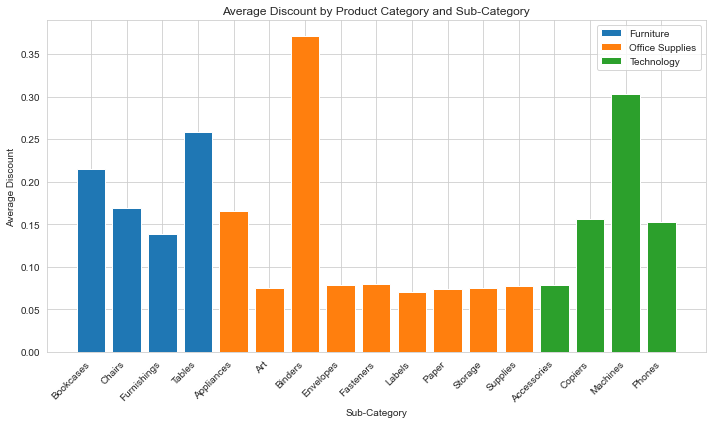

In [22]:
discounts = df_cleaned.groupby(['Category', 'Sub-Category'])['Discount'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
for category, category_df in discounts.groupby('Category'):
    plt.bar(category_df['Sub-Category'], category_df['Discount'], label=category)

plt.xlabel('Sub-Category')
plt.ylabel('Average Discount')
plt.title('Average Discount by Product Category and Sub-Category')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

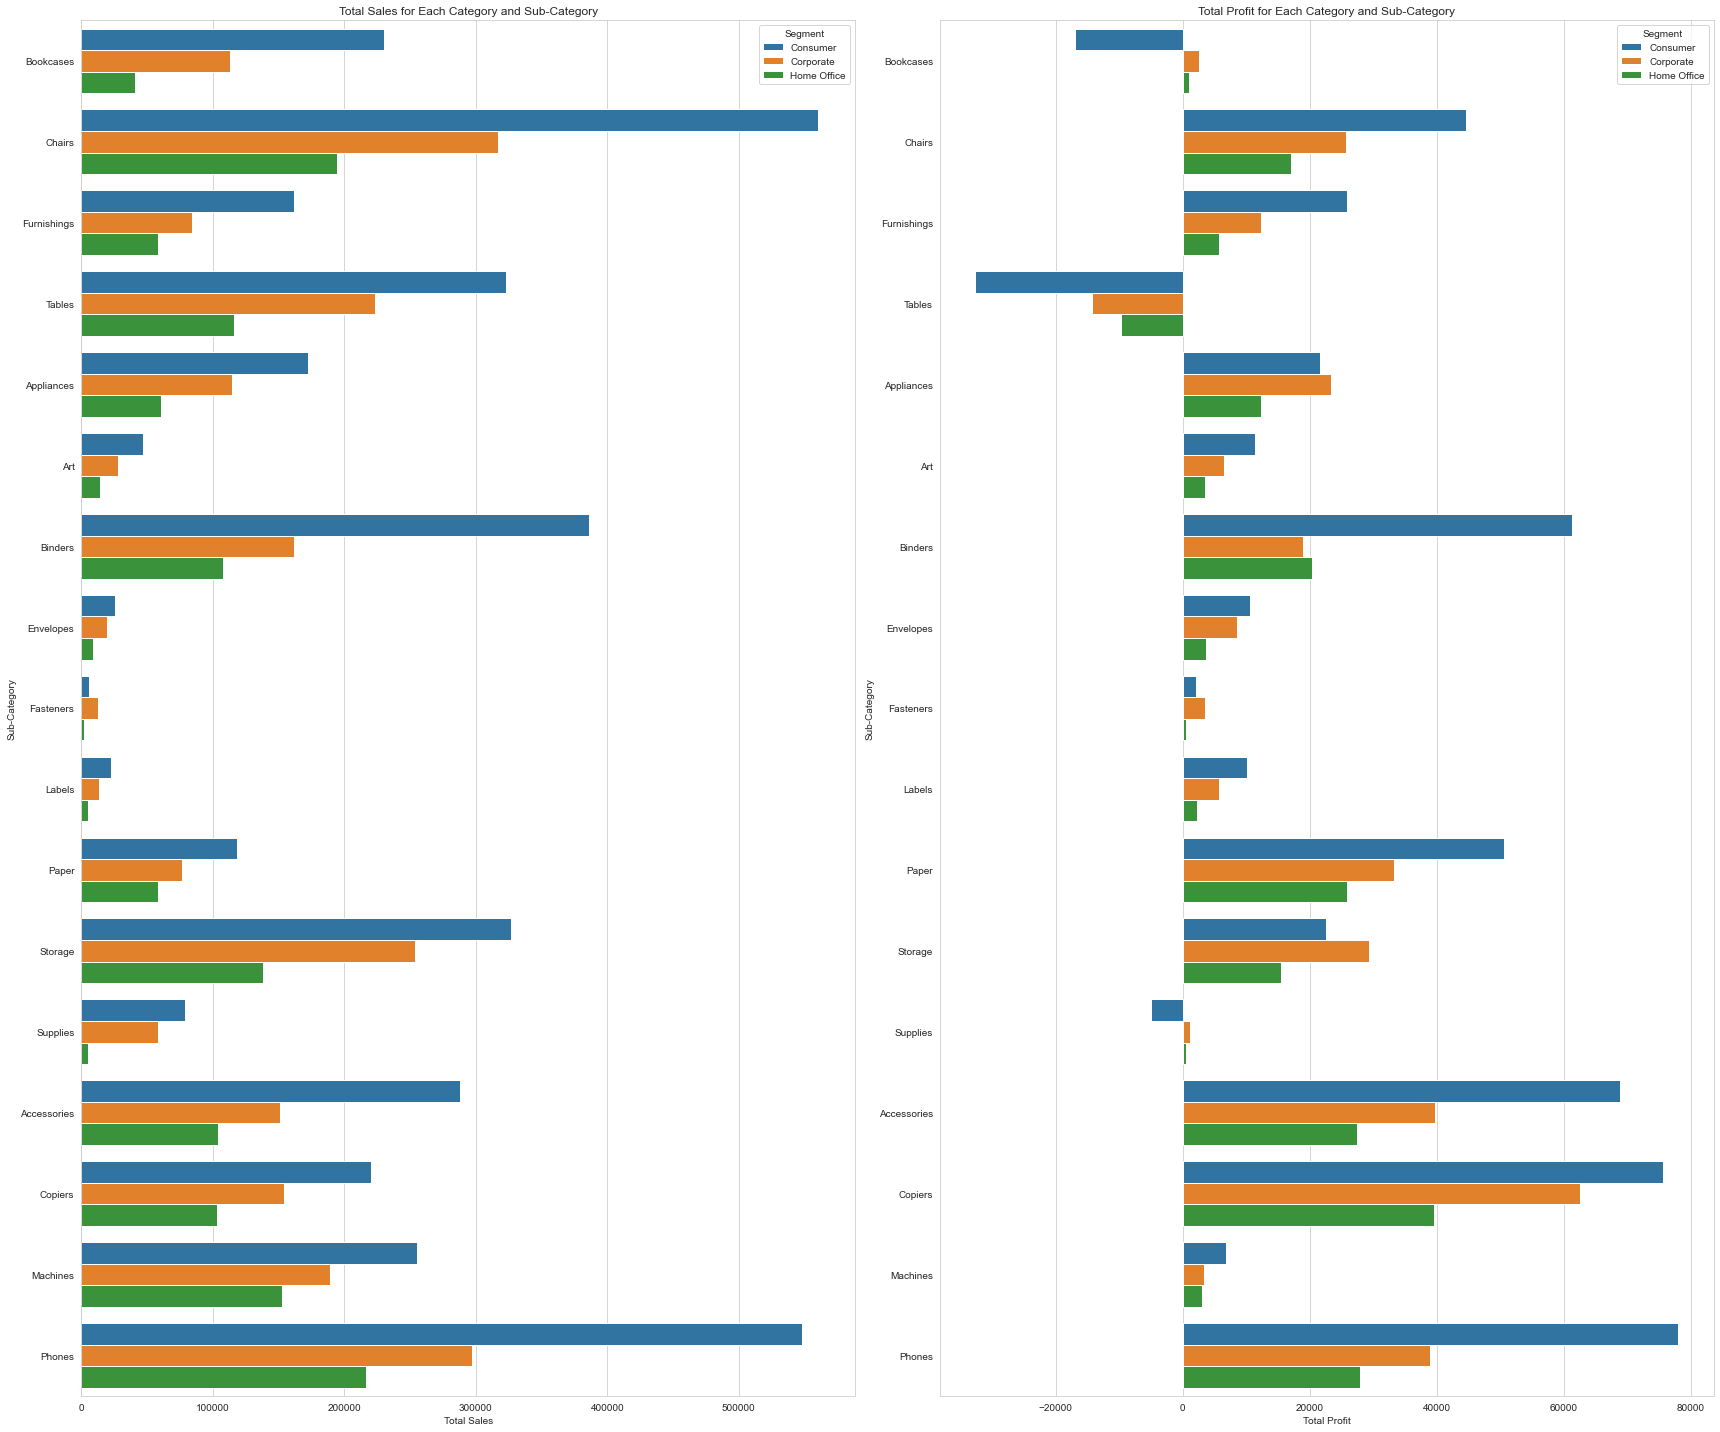

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Region', 'Category', and 'Sub-Category' and sum the 'Sales' and 'Profit'
grouped_data = df_cleaned.groupby(['Segment', 'Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a figure with two subplots, one for Sales and one for Profit
fig, axes = plt.subplots(1, 2, figsize=(24, 20))

# Plot the Sales data for all regions
sns.barplot(data=grouped_data, x='Sales', y='Sub-Category', hue='Segment', ax=axes[0])
axes[0].set_title('Total Sales for Each Category and Sub-Category')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('Sub-Category')

# Plot the Profit data for all regions
sns.barplot(data=grouped_data, x='Profit', y='Sub-Category', hue='Segment', ax=axes[1])
axes[1].set_title('Total Profit for Each Category and Sub-Category')
axes[1].set_xlabel('Total Profit')
axes[1].set_ylabel('Sub-Category')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


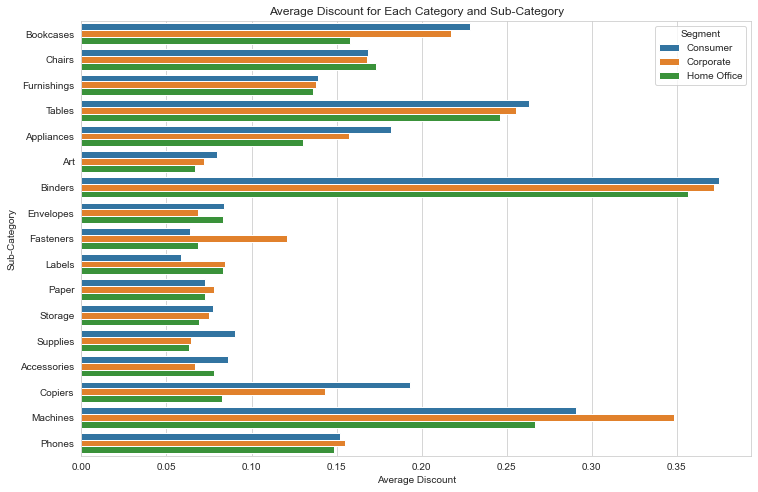

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Region', 'Category', and 'Sub-Category' and calculate the average 'Discount'
grouped_data = df_cleaned.groupby(['Segment', 'Category', 'Sub-Category']).agg({'Discount': 'mean'}).reset_index()

# Set the aesthetic style of the plot
sns.set_style("whitegrid")

# Create a figure
plt.figure(figsize=(12, 8))

# Plot the Average Discount data for all regions
sns.barplot(data=grouped_data, x='Discount', y='Sub-Category', hue='Segment')
plt.title('Average Discount for Each Category and Sub-Category')
plt.xlabel('Average Discount')
plt.ylabel('Sub-Category')

# Adjust the legend
plt.legend(title='Segment')

# Show the plot
plt.show()


In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Region', 'Product_Category', and 'Product_Subcategory' columns
df_cleaned['Ship Mode'] = label_encoder.fit_transform(df_cleaned['Ship Mode'])
df_cleaned['Segment'] = label_encoder.fit_transform(df_cleaned['Segment'])
df_cleaned['Country'] = label_encoder.fit_transform(df_cleaned['Country'])
df_cleaned['City'] = label_encoder.fit_transform(df_cleaned['City'])
df_cleaned['State'] = label_encoder.fit_transform(df_cleaned['State'])
df_cleaned['Region'] = label_encoder.fit_transform(df_cleaned['Region'])
df_cleaned['Category'] = label_encoder.fit_transform(df_cleaned['Category'])
df_cleaned['Sub-Category'] = label_encoder.fit_transform(df_cleaned['Sub-Category'])


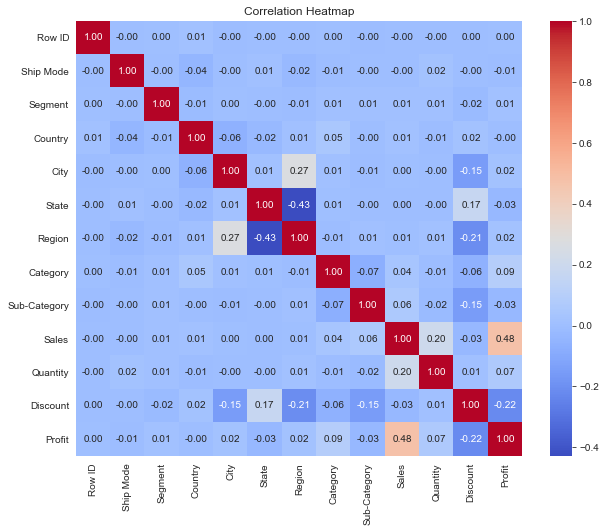

In [27]:
correlation_matrix = df_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# What are the purchasing patterns of different customer segments?

### Analyse purchase frequency, order size, and preferred product categories across various customer segments (Consumer, Corporate, Home Office).

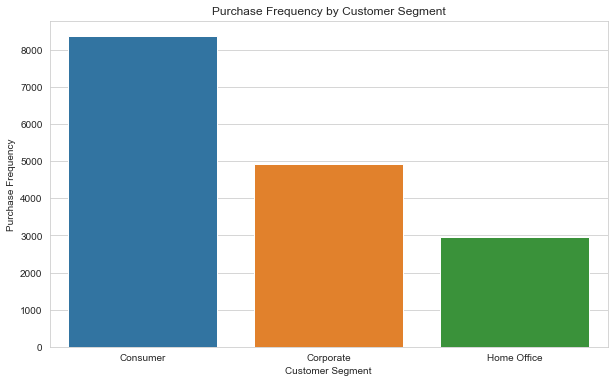

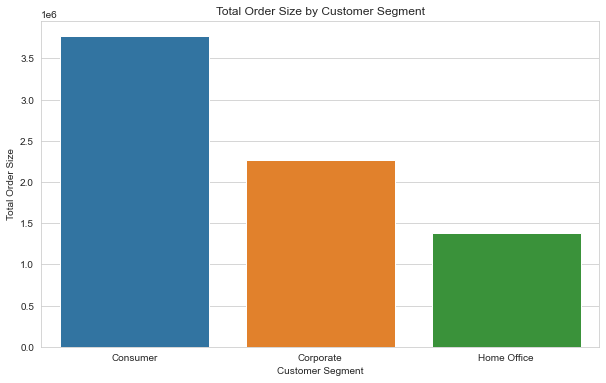

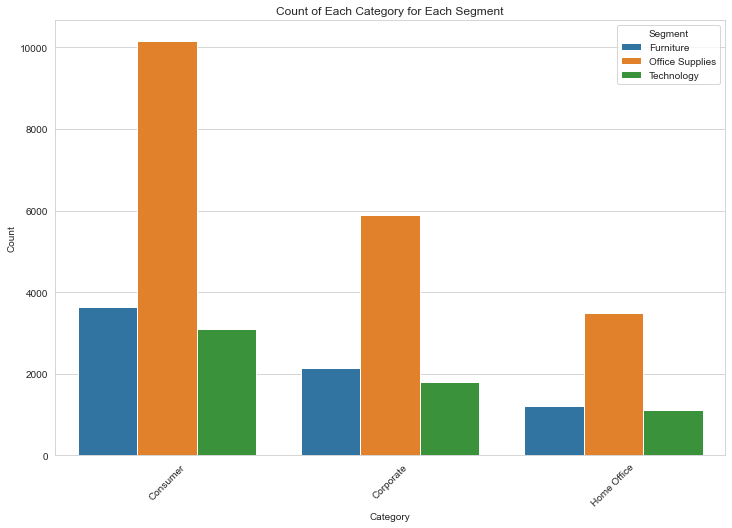

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned contains the cleaned dataset

# Analyze Purchase Frequency
purchase_frequency = df_cleaned.groupby('Segment')['Order ID'].nunique().reset_index()
purchase_frequency.columns = ['Segment', 'Purchase Frequency']

# Plot Purchase Frequency
plt.figure(figsize=(10, 6))
sns.barplot(data=purchase_frequency, x='Segment', y='Purchase Frequency')
plt.title('Purchase Frequency by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Purchase Frequency')
plt.show()

# Analyze Order Size
order_size = df_cleaned.groupby('Segment')['Sales'].sum().reset_index()

# Plot Order Size
plt.figure(figsize=(10, 6))
sns.barplot(data=order_size, x='Segment', y='Sales')
plt.title('Total Order Size by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Order Size')
plt.show()

category_counts = df_cleaned.groupby(['Segment', 'Category']).size().reset_index(name='Count')

# Set the aesthetic style of the plot
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=category_counts, x='Segment', y='Count', hue='Category')
plt.title('Count of Each Category for Each Segment')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()
